# TS3: Simulación de un ADC (cuantización) parte 1/2
## Consigna:
***
En esta tarea simularemos el comportamiento de un ADC y cómo sus parámetros, tamaño de palabra de B bits y frecuencia de muestreo fs afectan a una señal (aproximadamente) analógica.

Para ello se puede analizar una senoidal con los siguientes parámetros:

 + frecuencia $f_0$ arbitraria, por ejemplo $f_0=\frac{f_S}{N}=\triangle f$, 
 + Amplitud normalizada, es decir unitaria
 
Se pide diseñar un bloque cuantizador que opere sobre una señal discreta en tiempo $s_R$, de forma tal que para un ADC de $B$ bits y rango $\pmV_F$, el operador.

\begin{equation}
s_Q=Q_{B,VF}\{s_R\}
\end{equation}

generará una $s_Q$ comprendida entre $\pmV_F$ y con valores discretos establecidos por el paso de cuantización $q = \frac{2V_F}{2^{B-1}}\approx\frac{V_F}{2^{B-1}}$ (Volts).

Visualice en una misma gráfica $s_R$ y $s_Q$, donde se pueda observar que tienen el mismo rango en Volts y el efecto de la cuantización para $V_F=2$ Volts y $B =$ 4, 8 y 16 bits.

Bonus:
🤯 Analizar la señal de error $e=s_Q-s_R$ verificando las descripciones estadísticas vistas en teoría (Distribución uniforme, media, varianza, incorrelación)

Ayuda:
+ Tienen las clases grabadas y una serie de tres videos míos con una explicación 

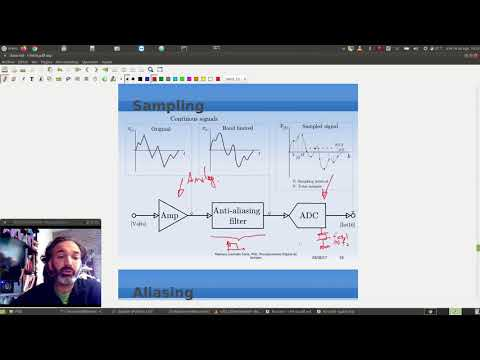

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo('oaVkWCAId34', width=800, height=300)

***
## Solucion propuesta:
### Módulos utilizados:

In [4]:
from tools_psd import signal_generator
import numpy as np
import matplotlib.pyplot as plt

### Implementacion del cuantizador:

In [1]:
def cuantizador(signal, vf, B):
    q = vf/(2**(B-1))
    sr = np.round(signal/q)
    sr = sr*q
    for i,m in enumerate(sr):
        if m > vf:
            sr[i] = vf
        elif m < -vf:
            sr[i] = -vf
    return sr, q

### Implementacion del generador de señales

In [67]:
def signal_generator( vmax = 1, dc = 0, ff = 1, ph=0, nn = 1, fs = 1, signal='senoidal', over_sampling=1):
    
    ts = 1/fs
    
    N_os = nn*over_sampling
    
    tt_os = np.linspace(0, (nn-1)*ts, N_os).flatten()
    
    x_os = np.array([], dtype=np.float).reshape(N_os,0)
    
    if signal == 'senoidal':
        
        aux = vmax * np.sin(2*np.pi*ff*tt_os + ph) + dc
        x_os = np.hstack([x_os, aux.reshape(N_os,1)] )
        x_os = x_os.reshape(N_os,)
        
    elif signal == 'ruido':
        
        x_os = np.random.random_sample((N_os,))
    
    tt = np.linspace(0, (nn-1)*ts, nn).flatten()
    x = x_os[::over_sampling]
    return tt_os, x_os, tt, x

### Simulacion de un ADC (Cuantizacion)
#### Resolucion de 4 Bits

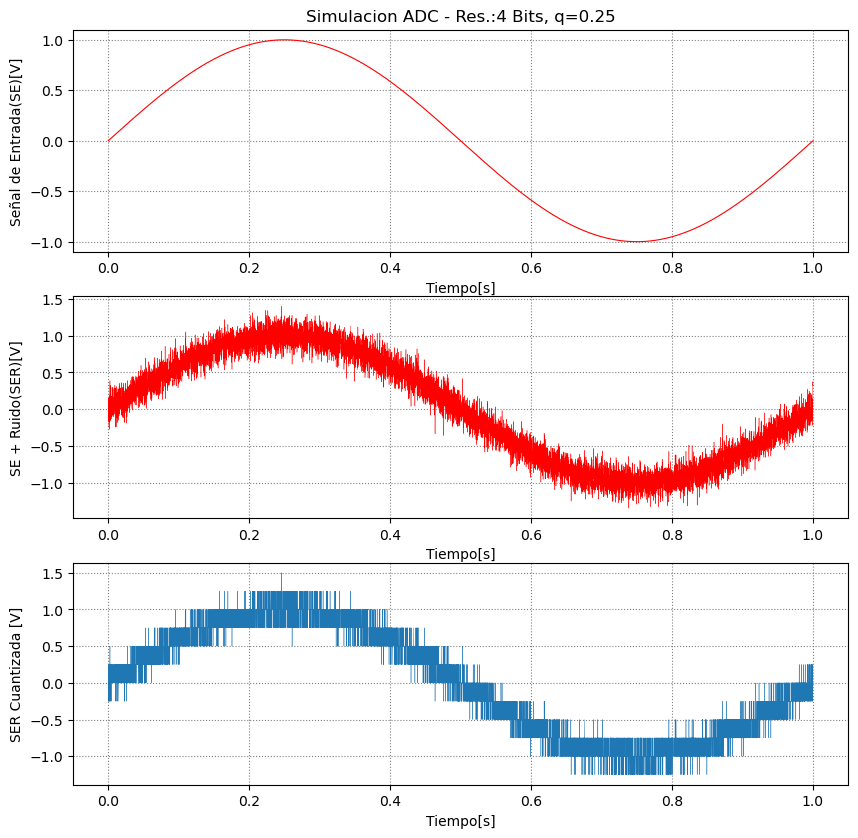

In [69]:
fig1 = plt.figure(1, figsize=(10, 10), dpi=100)

#========Generador=============
ff = 1
fs = 10000
nn = 10000
vmax = 1
dc = 0
ph1 = 0
tipo_sg = 'senoidal'
ov_s=10
#==============================

#=======Datos ADC==============
vf=2  #Rango en volts del ADC  
B=4   #Resolucion del ADC
q=vf/(2**(B-1))
#==============================

#=========Señal================
tt_os, xx_os, tt1, xx1 = signal_generator(vmax, dc, ff, ph1, nn, fs, tipo_sg, over_sampling=ov_s)
#==============================

#=======Ruido analogico========
r = np.random.normal(0, q/2, nn)
r = r.reshape(nn,)
xx_r = np.add(xx1, r)
#==============================

#===========ADC================
sr, q = cuantizador(xx_r, vf, B)
#==============================

fig1.add_subplot(3,1,1)
plt.plot(tt1, xx1, linewidth=0.8, color='red')
plt.grid(color='gray', linestyle='dotted', linewidth=0.8)
plt.xlabel('Tiempo[s]')
plt.ylabel('Señal de Entrada(SE)[V]')
plt.title(f'Simulacion ADC - Res.:{B} Bits, q={q}')

fig1.add_subplot(3,1,2)
plt.grid(color='gray', linestyle='dotted', linewidth=0.8)
plt.xlabel('Tiempo[s]')
plt.ylabel('SE + Ruido(SER)[V]')
plt.plot(tt1, xx_r, linewidth=0.3, color='red')

fig1.add_subplot(3,1,3)
plt.grid(color='gray', linestyle='dotted', linewidth=0.8)
plt.xlabel('Tiempo[s]')
plt.ylabel('SER Cuantizada [V]')
plt.plot(tt1, sr, linewidth=0.3)

#### Resolucion de 8 Bits

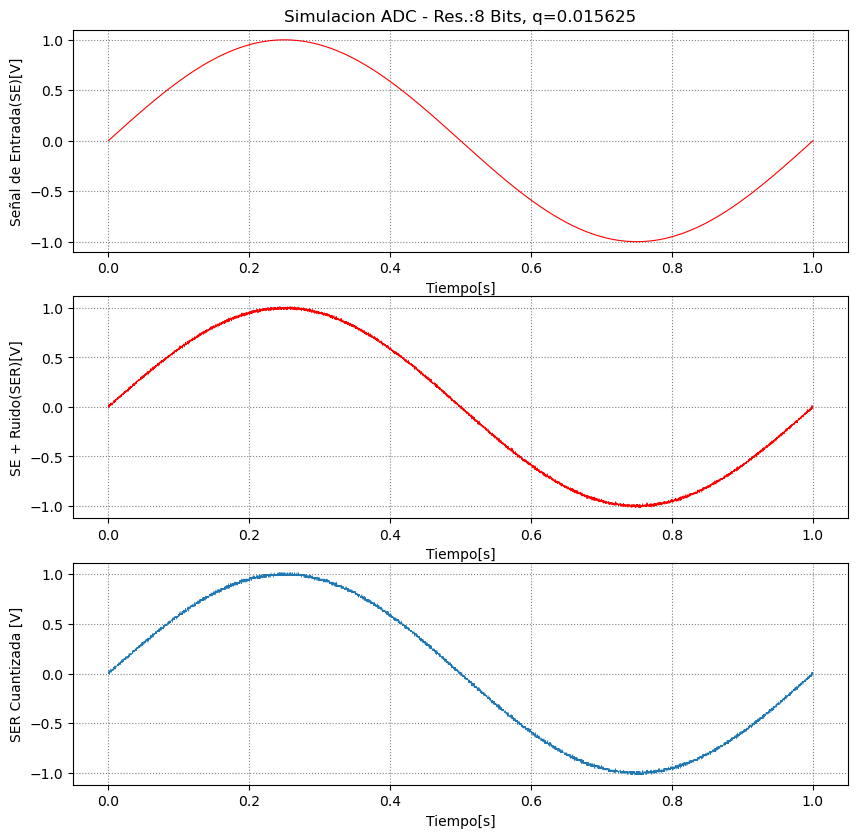

In [30]:
fig1 = plt.figure(1, figsize=(10, 10), dpi=100)

#========Generador=============
ff = 1
fs = 10000
nn = 10000
vmax = 1
dc = 0
ph1 = 0
tipo_sg = 'senoidal'
ov_s=10
#==============================

#=======Datos ADC==============
vf=2  #Rango en volts del ADC  
B=8   #Resolucion del ADC
q=vf/(2**(B-1))
#==============================

#=========Señal================
tt_os, xx_os, tt1, xx1 = signal_generator(vmax, dc, ff, ph1, nn, fs, tipo_sg, over_sampling=ov_s)
#==============================

#=======Ruido analogico========
r = np.random.normal(0, q/2, nn)
r = r.reshape(nn,)
xx_r = np.add(xx1, r)
#==============================

#===========ADC================
sr, q = cuantizador(xx_r, vf, B)
#==============================

fig1.add_subplot(3,1,1)
plt.plot(tt1, xx1, linewidth=0.8, color='red')
plt.grid(color='gray', linestyle='dotted', linewidth=0.8)
plt.xlabel('Tiempo[s]')
plt.ylabel('Señal de Entrada(SE)[V]')
plt.title(f'Simulacion ADC - Res.:{B} Bits, q={q}')

fig1.add_subplot(3,1,2)
plt.grid(color='gray', linestyle='dotted', linewidth=0.8)
plt.xlabel('Tiempo[s]')
plt.ylabel('SE + Ruido(SER)[V]')
plt.plot(tt1, xx_r, linewidth=0.3, color='red')

fig1.add_subplot(3,1,3)
plt.grid(color='gray', linestyle='dotted', linewidth=0.8)
plt.xlabel('Tiempo[s]')
plt.ylabel('SER Cuantizada [V]')
plt.plot(tt1, sr, linewidth=0.3)

#### Resolucion de 16 Bits

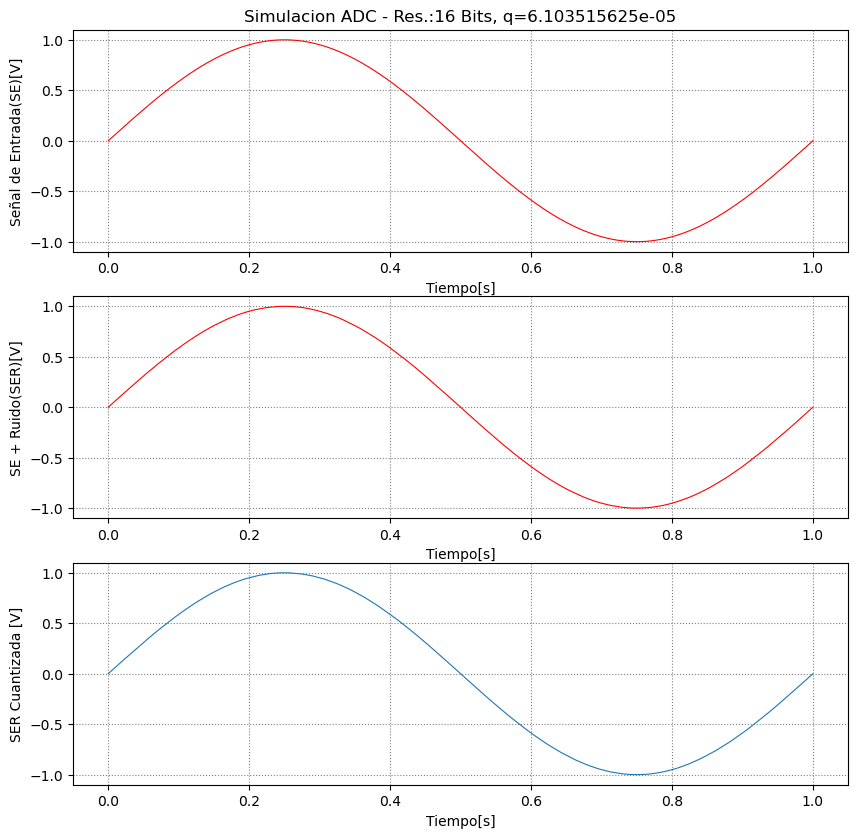

In [32]:
fig1 = plt.figure(1, figsize=(10, 10), dpi=100)

#========Generador=============
ff = 1
fs = 10000
nn = 10000
vmax = 1
dc = 0
ph1 = 0
tipo_sg = 'senoidal'
ov_s=10
#==============================

#=======Datos ADC==============
vf=2  #Rango en volts del ADC  
B=16  #Resolucion del ADC
q=vf/(2**(B-1))
#==============================

#=========Señal================
tt_os, xx_os, tt1, xx1 = signal_generator(vmax, dc, ff, ph1, nn, fs, tipo_sg, over_sampling=ov_s)
#==============================

#=======Ruido analogico========
r = np.random.normal(0, q/2, nn)
r = r.reshape(nn,)
xx_r = np.add(xx1, r)
#==============================

#===========ADC================
sr, q = cuantizador(xx_r, vf, B)
#==============================

fig1.add_subplot(3,1,1)
plt.plot(tt1, xx1, linewidth=0.8, color='red')
plt.grid(color='gray', linestyle='dotted', linewidth=0.8)
plt.xlabel('Tiempo[s]')
plt.ylabel('Señal de Entrada(SE)[V]')
plt.title(f'Simulacion ADC - Res.:{B} Bits, q={q}')

fig1.add_subplot(3,1,2)
plt.grid(color='gray', linestyle='dotted', linewidth=0.8)
plt.xlabel('Tiempo[s]')
plt.ylabel('SE + Ruido(SER)[V]')
plt.plot(tt1, xx_r, linewidth=0.8, color='red')

fig1.add_subplot(3,1,3)
plt.grid(color='gray', linestyle='dotted', linewidth=0.8)
plt.xlabel('Tiempo[s]')
plt.ylabel('SER Cuantizada [V]')
plt.plot(tt1, sr, linewidth=0.8)

### Señal de error:

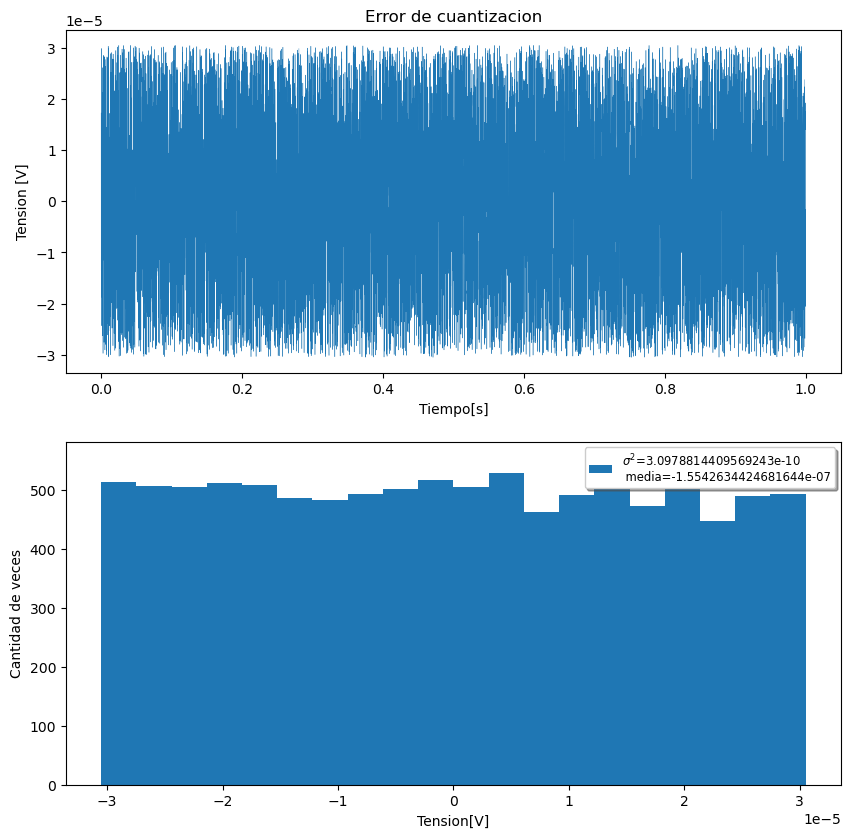

In [53]:
err = xx_r - sr

fig2 = plt.figure(2, figsize=(10, 10), dpi=100)
fig2.add_subplot(2,1,1)
plt.plot(tt1, err, linewidth=0.3)
plt.xlabel('Tiempo[s]')
plt.ylabel('Tension [V]')
plt.title('Error de cuantizacion')

fig2.add_subplot(2,1,2)
plt.hist(err, bins=20, label=f"$\sigma^2$={np.var(err)}\n media={np.mean(err)}")
plt.xlabel('Tension[V]')
plt.ylabel('Cantidad de veces')
plt.legend(loc='upper right', shadow=True, fontsize='small')

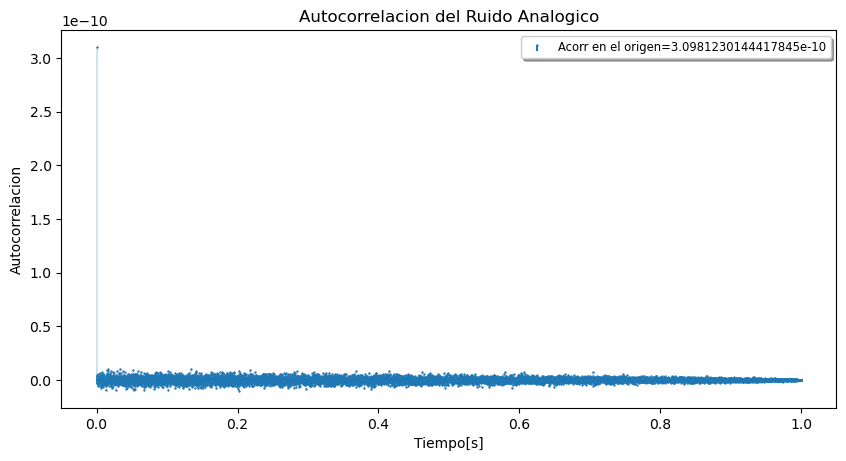

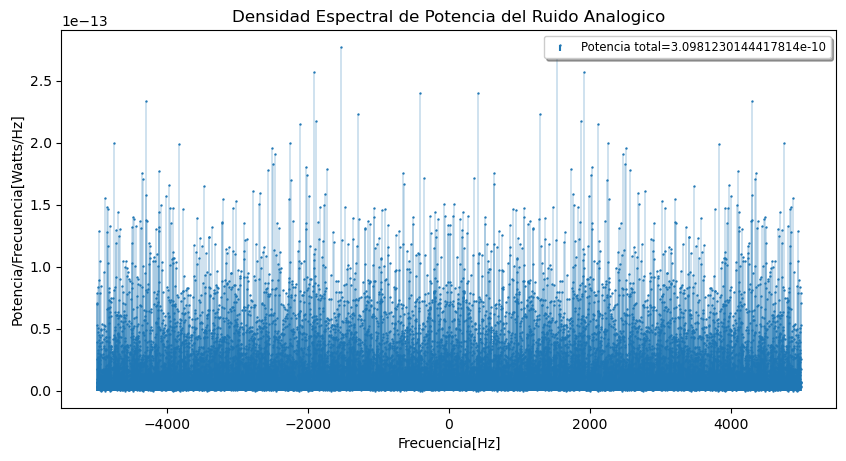

In [56]:
acorr = np.correlate(err, err, mode='full')*(1/nn)
acorr = acorr[acorr.size // 2 : ]

f = np.fft.fftfreq(nn, d=1/fs)
dep = np.fft.fft(err)/nn

pot_total = sum(np.abs(dep)**2)

plt.figure(3, figsize=(10, 5), dpi=100)
markerline, stemline, baseline = plt.stem(tt1, acorr, basefmt=" ", label=f'Acorr en el origen={acorr[0]}')
plt.setp(stemline, linewidth = 0.3)
plt.setp(markerline, markersize = 0.7)
plt.title('Autocorrelacion del Ruido Analogico')
plt.xlabel('Tiempo[s]')
plt.ylabel('Autocorrelacion')
plt.legend(loc='upper right', shadow=True, fontsize='small')

plt.figure(4, figsize=(10, 5), dpi=100)
markerline, stemline, baseline = plt.stem(f, (np.abs(dep))**2, basefmt=" ", label=f'Potencia total={pot_total}')
plt.setp(stemline, linewidth = 0.3)
plt.setp(markerline, markersize = 0.7)
plt.title('Densidad Espectral de Potencia del Ruido Analogico')
plt.xlabel('Frecuencia[Hz]')
plt.ylabel('Potencia/Frecuencia[Watts/Hz]')
plt.legend(loc='upper right', shadow=True, fontsize='small')